Similar to my last post, this is going to be a refresher on using the matplotlib library.

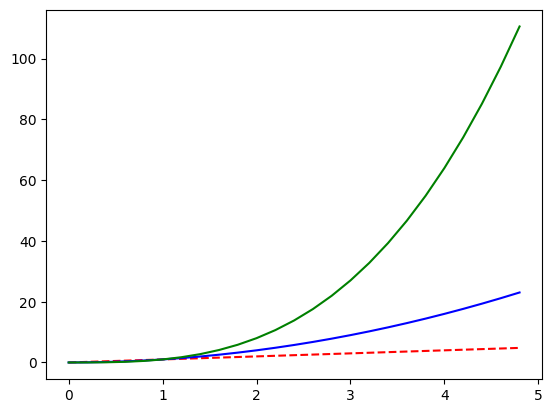

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
t = np.arange(0., 5., 0.2)

# Plot all three lines in a single call
# 'r--' for red dashes, 'bs' for blue squares (markers only), 'g^' for green triangles (markers only)
# Note: for full lines, it's generally clearer to use the multiple calls method with labels.
plt.plot(t, t, 'r--', t, t**2, 'b', t, t**3, 'g')

# Display the plot
plt.show()


In [39]:
import pandas as pd
df = pd.read_csv("../pandas-crash-course/data/sales_data.csv")
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


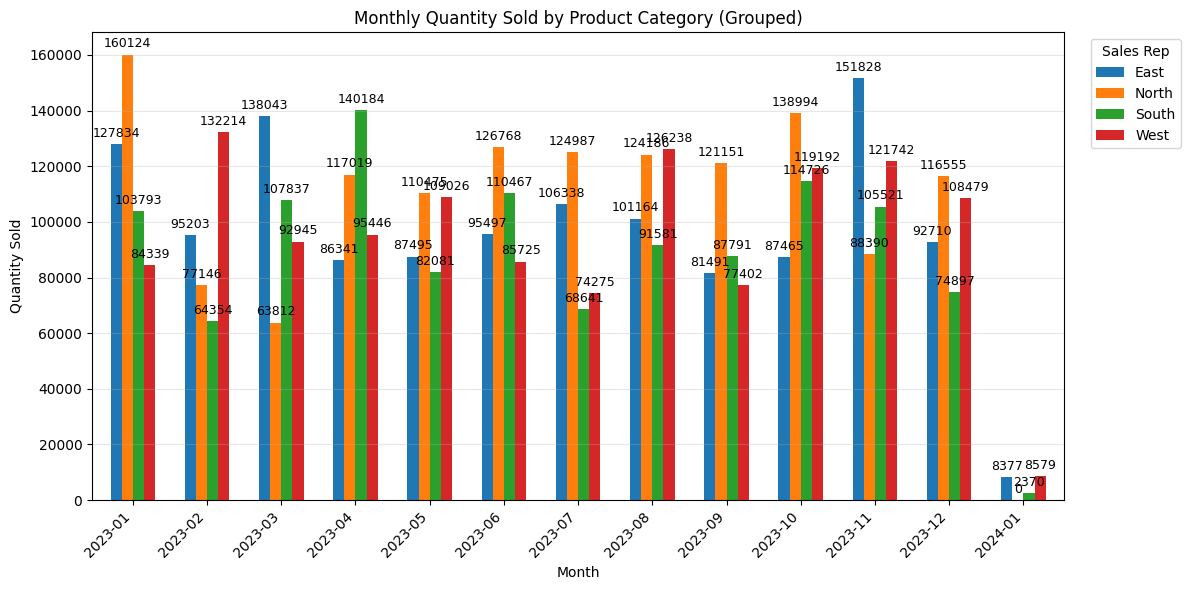

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

df["Sale_Date"] = pd.to_datetime(df["Sale_Date"])

# Assuming your pivoted data (use pivot_table to be safe)
pivot = df.groupby([df['Sale_Date'].dt.to_period('M'), 'Region'])['Sales_Amount']\
         .sum().unstack().fillna(0)

# Plot
ax = pivot.plot(kind='bar', figsize=(12, 6), width=0.6)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=9, fmt='%d')

plt.title('Monthly Quantity Sold by Product Category (Grouped)', fontsize=12)
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.legend(title='Sales Rep', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()